In [12]:
import keras, tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
from IPython import display
from pathlib import Path
import os
from keras import layers, models

for i in range(10000):
        xpts = np.random.rand(100) * 10
        ypts = (np.sin(xpts) + 1)/2


xpts = xpts/len(xpts)
model = keras.Sequential(
    [
        keras.Input(shape=(1,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               512       
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [2]:
batch_size = 128
epochs = 15000

model.compile(loss="mse", optimizer="adam", metrics=["mae"])

history = model.fit(xpts, ypts, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose = 0)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


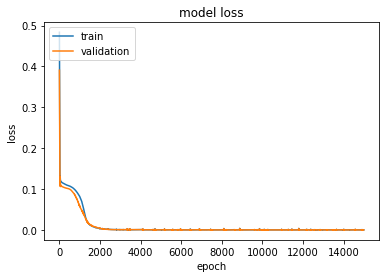

In [5]:
print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [6]:
batch_size = 128
epochs = 15000

model.compile(loss="mse", optimizer="sgd", metrics=["mae"])

history = model.fit(xpts, ypts, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose = 0)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


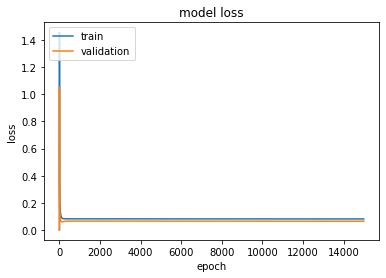

In [7]:
print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

4/4 [==============================] - 0s 3ms/step


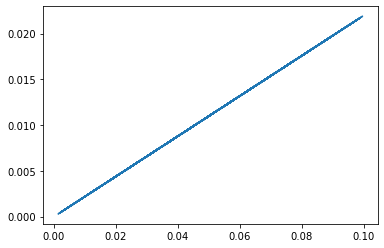

In [13]:

ypts = model.predict(xpts)

plt.plot(xpts, ypts)
plt.show()